In [13]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# ML WORKFLOW STEP 1: DATA INPUT 
data = pd.read_csv('diabetes.csv') # download the csv file provided and make sure it is in the same directory you're running the code
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
# ML WORKFLOW STEP 2: DATA PROCESSING
print("\nMissing values per column:")
print(data.isnull().sum())
data.info()
# No processing needed


Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 

In [18]:
# ML WORKFLOW STEP 3: MACHINE LEARNING MODEL
# 3.1 Feature matrix and target vector
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# 3.2, 3.3, 3.4, 3.5 Choose, Instantiate, Fit and Predict with Classification Models

# -----------------------------------

# Model 1: Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Cross-validation
log_scores = cross_val_score(log_model, X, y, cv=5)
log_pred = cross_val_predict(log_model, X, y, cv=5)

# -----------------------------------

# Model 2: Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_params = {'max_depth': [3, 5, 10, None]}
dt_grid = GridSearchCV(dt_model, dt_params, cv=5)
dt_grid.fit(X_train, y_train)

dt_best = dt_grid.best_estimator_
dt_scores = cross_val_score(dt_best, X, y, cv=5)
dt_pred = cross_val_predict(dt_best, X, y, cv=5)

# -----------------------------------

# Model 3: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [50, 100], 'max_depth': [5, 10, None]}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5)
rf_grid.fit(X_train, y_train)

rf_best = rf_grid.best_estimator_
rf_scores = cross_val_score(rf_best, X, y, cv=5)
rf_pred = cross_val_predict(rf_best, X, y, cv=5)

print("All 3 models succesfully instantiated, fitted and used to predict")

All 3 models succesfully instantiated, fitted and used to predict



=== Logistic Regression ===
Accuracy (5-fold): 0.7721925133689839
Precision: 0.7162790697674418
Recall: 0.5746268656716418


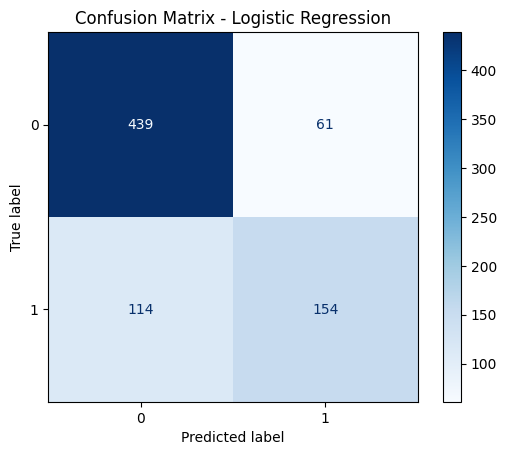


=== Decision Tree ===
Best Parameters: {'max_depth': 3}
Accuracy (5-fold): 0.7291656056361939
Precision: 0.6685393258426966
Recall: 0.44402985074626866


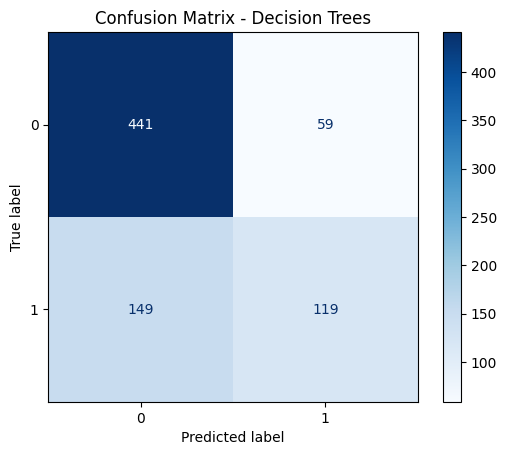


=== Random Forest ===
Best Parameters: {'max_depth': None, 'n_estimators': 50}
Accuracy (5-fold): 0.774755962991257
Precision: 0.7230046948356808
Recall: 0.5746268656716418


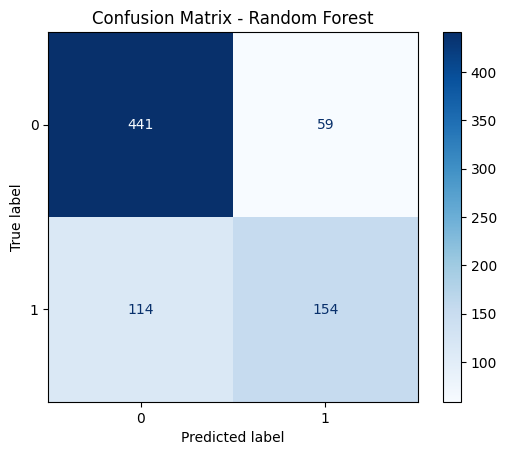

In [21]:
# ML WORKFLOW STEP 4: VALIDATION    
from sklearn.metrics import ConfusionMatrixDisplay

print("\n=== Logistic Regression ===")
print("Accuracy (5-fold):", log_scores.mean())
print("Precision:", precision_score(y, log_pred))
print("Recall:", recall_score(y, log_pred))
cm = confusion_matrix(y, log_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix - Logistic Regression')
plt.show()


print("\n=== Decision Tree ===")
print("Best Parameters:", dt_grid.best_params_)
print("Accuracy (5-fold):", dt_scores.mean())
print("Precision:", precision_score(y, dt_pred))
print("Recall:", recall_score(y, dt_pred))
cm = confusion_matrix(y, dt_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix - Decision Trees')
plt.show()

print("\n=== Random Forest ===")
print("Best Parameters:", rf_grid.best_params_)
print("Accuracy (5-fold):", rf_scores.mean())
print("Precision:", precision_score(y, rf_pred))
print("Recall:", recall_score(y, rf_pred))
cm = confusion_matrix(y, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix - Random Forest')
plt.show()

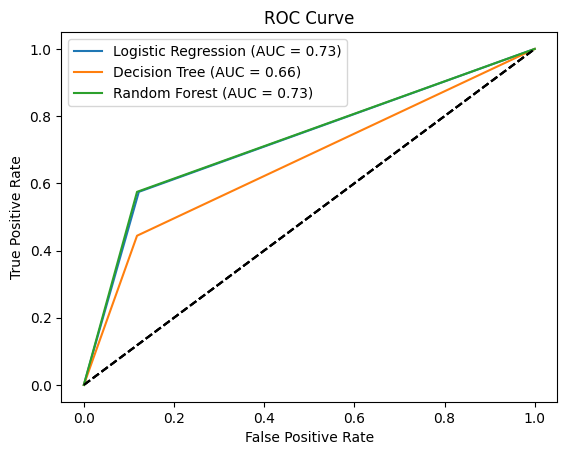

In [28]:
# ML WORKFLOW STEP 5: VISUALIZATION   
from sklearn.metrics import roc_curve, auc

def plot_roc(model_name, y_true, y_proba):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

plt.figure()
plot_roc("Logistic Regression", y, log_pred)
plot_roc("Decision Tree", y, dt_pred)
plot_roc("Random Forest", y, rf_pred)
plt.show()
